In [23]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [2]:
df = gpd.read_file(r'data/Tree_Inventory_Denver.csv')

C:\Users\fac_pisel\Anaconda3\envs\datascience\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [7]:
#df['x'] = df.apply(lambda row: float(row.the_geom.split(' ')[1][1:]), axis=1)
#df['y'] = df.apply(lambda row: float(row.the_geom.split(' ')[2][:-1]), axis=1)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['X_LONG'], df['Y_LAT']))
gdf['index_col'] = gdf.index
gdf = gdf.set_crs(epsg=4326)
gdf.to_crs(epsg=3857, inplace=True)

In [8]:
red_trees = ['Maple, Red', 'Oak, Northern Red','Chokecherry, Canada Red',
            'Redbud, Western','Redwood, Dawn','Oak, Texas Red', 'Alder, Red',
             'Cherry, Black', 'Dogwood, flowering', 'Oak, White',
             'Hornbeam, European', 'Hornbeam, American',
       'Upright European Hornbeam', 'Sourwood', 'Sweetgum','Oak, Swamp White',
             'Black Oak', 'Sumac, Staghorn', 'Sumac'            
            ]

In [13]:
red_subset = gdf[gdf['SPECIES_CO'].isin(red_trees)]

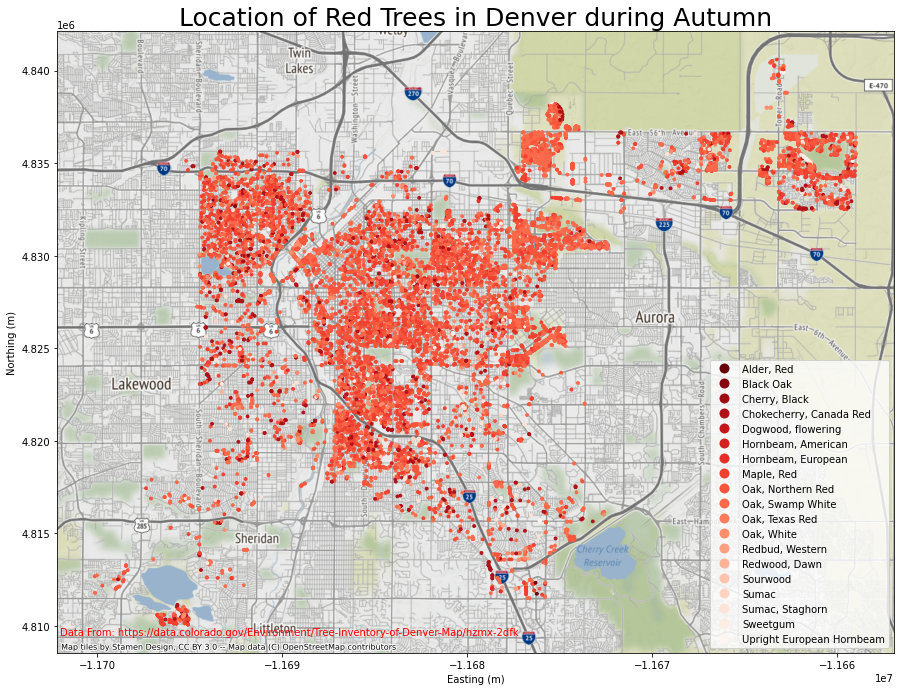

In [37]:
ax = red_subset.plot(column='SPECIES_CO', cmap='Reds_r', legend=True, figsize=(15,15), markersize=8)
cx.add_basemap(ax, zoom=12)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.title('Location of Red Trees in Denver during Autumn', fontsize=25)
plt.text(-1.1702e7, 4.8095e6,
         r'Data From: https://data.colorado.gov/Environment/Tree-Inventory-of-Denver-Map/hzmx-2dfk', {'color': 'r', 'fontsize': 10})
plt.savefig('Day_6.png')